In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pydataset import data

In [28]:
df = data('iris')

In [29]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


### Re-examining the df in July 2021

In [30]:
# renaming the columns

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [31]:
# take a look at the size of the df

df.shape

(150, 5)

In [32]:
# take a closer look at the columns, check for nulls

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [33]:
# getting a closer look at the numerical columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [34]:
# how many unique values are in species

df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [35]:
# let's find the avg values of the three species

df.groupby(['species']).mean().T

species,setosa,versicolor,virginica
sepal_length,5.006,5.936,6.588
sepal_width,3.428,2.770,2.974
petal_length,1.462,4.260,5.552
petal_width,0.246,1.326,2.026


### Some initial observations:
- setosa is smallest in every category except sepal_width
- versicolor is the middle child in every category except sepal_width
- virginica is the largest in every category except, you guessed it, sepal_width
- sepal_width is the only category that trends differently than the others

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


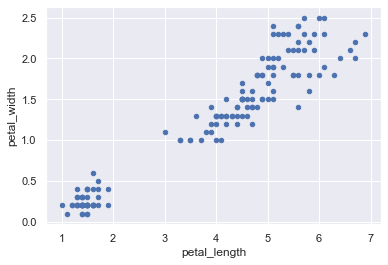

In [42]:
# visualization with  a scatterplot

df.plot(kind="scatter", x="petal_length", y="petal_width")

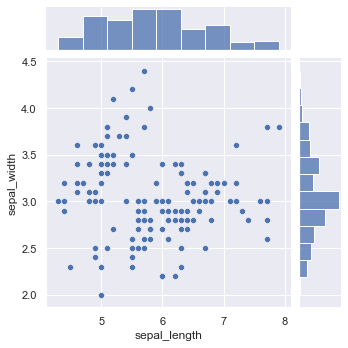

In [38]:
# a seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure

sns.jointplot(x="sepal_length", y="sepal_width", data=df, height=5)

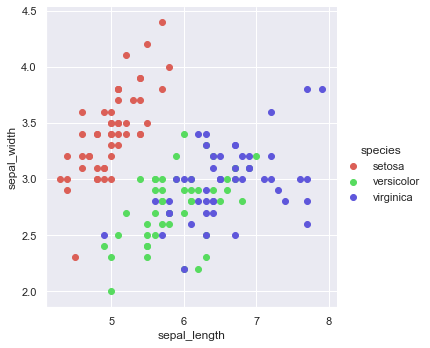

In [44]:
# adding a parameter to the FacetGrid function for color palette. Using hls for bold color.

sns.FacetGrid(df, hue="species", palette="hls", height=5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()

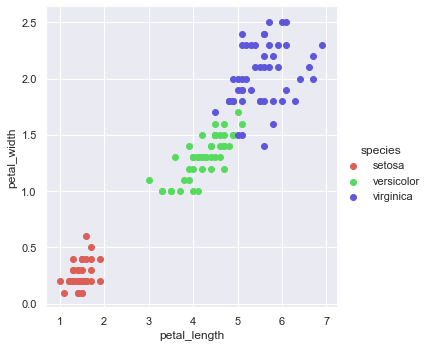

In [45]:
# I liked that so much that I'll do the same with the petals

sns.FacetGrid(df, hue="species", palette="hls", height=5) \
   .map(plt.scatter, "petal_length", "petal_width") \
   .add_legend()